In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('..')

##Custom Lib
import lib
from lib.data_clean import DataClean
from lib.data_explore import DataExplore
from lib.classifier_trainer import ClassifierJob, MainAiJob
from lib import consume_validation
from lib.plot import roc
##

# Import ML modele packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from joblib import load

In [3]:
df_inc = pd.read_csv("../data/cohorte_full_data.csv")
df_all = df_inc
df_all.head(5)

Chu Patient_numbers  target   Age  Leucocytes (G/L)  VGM (fL)  \
0  Grenoble               1     1.0   4.0               3.6      84.0   
1  Grenoble               2     1.0  46.0               7.1      77.3   
2  Grenoble               3     1.0  52.0               1.9      83.4   
3  Grenoble               4     1.0  49.0               1.0     102.3   
4  Grenoble               5     1.0  49.0               1.1      91.1   

   CCMH (g/L)  PNN (G/L)  Lymphos_(%)  TP (%) Fibrinogene (g/L)  PNE (%)  \
0       354.0        0.8         63.9    67.0               2.9      0.0   
1       349.0        4.5         23.9    55.0                 2      0.0   
2       360.0        7.0         36.8    80.0               1.1      1.0   
3       348.0        0.1         80.0    94.0               3.1      0.0   
4       341.0        0.4         36.4    86.0               3.1      0.0   

   Mono_(G_L) LDH (U/L)  Plq_(G_L)  
0         0.0       363        7.0  
1         0.6       888       47.0  
2         0.0       477       30.0  
3         0.0        90       35.0  
4         0.0       168       50.0

In [4]:
dataviz = DataExplore(df_all, 'target')
dataviz.count_na()

Total  Null_Count  Percent
LDH (U/L)            415          92    22.17
PNE (%)              415          59    14.22
Mono_(G_L)           415          59    14.22
Plq_(G_L)            415          50    12.05
Fibrinogene (g/L)    415          20     4.82
TP (%)               415          14     3.37
Lymphos_(%)          415          10     2.41
PNN (G/L)            415           9     2.17
Age                  415           1     0.24
VGM (fL)             415           1     0.24
CCMH (g/L)           415           1     0.24

In [5]:
cleandata = DataClean(df_all)
df_clean = cleandata.clean_job()

c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning:

All-NaN slice encountered



In [6]:
df_clean['Chu'] = df_inc['Chu']

In [7]:
pd.set_option('display.max_columns', df_clean.shape[1])

In [8]:
df_clean.head(5)

Chu  target   Age  Leucocytes_(G_L)  VGM_(fL)  CCMH_(g_L)  PNN_(G_L)  \
0  Grenoble     1.0   4.0               3.6      84.0       354.0        0.8   
1  Grenoble     1.0  46.0               7.1      77.3       349.0        4.5   
2  Grenoble     1.0  52.0               1.9      83.4       360.0        7.0   
3  Grenoble     1.0  49.0               1.0     102.3       348.0        0.1   
4  Grenoble     1.0  49.0               1.1      91.1       341.0        0.4   

   Lymphos_(%)  TP_(%)  Fibrinogene_(g_L)  PNE_(%)  Mono_(G_L)  LDH_(U_L)  \
0         63.9    67.0                2.9      0.0         0.0      363.0   
1         23.9    55.0                2.0      0.0         0.6      888.0   
2         36.8    80.0                1.1      1.0         0.0      477.0   
3         80.0    94.0                3.1      0.0         0.0       90.0   
4         36.4    86.0                3.1      0.0         0.0      168.0   

   Plq_(G_L)  
0        7.0  
1       47.0  
2       30.0  
3       35.0  
4       50.0

In [9]:
df_clean.columns

Index(['Chu', 'target', 'Age', 'Leucocytes_(G_L)', 'VGM_(fL)', 'CCMH_(g_L)',
       'PNN_(G_L)', 'Lymphos_(%)', 'TP_(%)', 'Fibrinogene_(g_L)', 'PNE_(%)',
       'Mono_(G_L)', 'LDH_(U_L)', 'Plq_(G_L)'],
      dtype='object')

In [10]:
drop_col = ['Chu','PNE_(%)','Plq_(G_L)', 'LDH_(U_L)' ,'Mono_(G_L)']

In [11]:
## Je définis la taille en % du test_set  0.3 pour un gros data set sinon 0.2
test_size=0.2

## Je définis une seed afin d'avoir un reproductibilité dans mon expérience 
## afin de bien comparer ma modélisation dans le même contexte
random_state= 69

# Model

In [12]:
## je crée un dictionnaire de model que je souhaite tester

dict_models = {
              "Random Forest ": RandomForestClassifier(),
#               "Gradient Boosting Classifier": GradientBoostingClassifier(),
#               "AdaBoost Classifier": AdaBoostClassifier(),
              "XgBoost": xgb.XGBClassifier(),
#               "Decision Tree": DecisionTreeClassifier(), 
#               "LR": LogisticRegression(max_iter=1000), 
#               "SVM":svm.SVC(kernel='poly'),
             }


*********  Random Forest   *********

Score train : 1.0
-----------
Score test : 0.9
-----------
AUC: 0.95 (std:0.0166), (splits = 5)


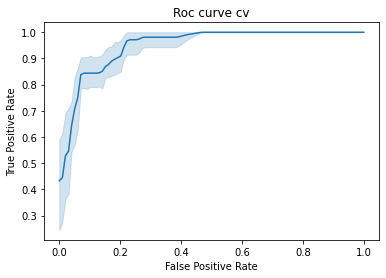

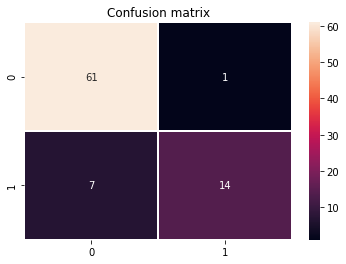

--------
Classification reporting
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94        62
         1.0       0.93      0.67      0.78        21

    accuracy                           0.90        83
   macro avg       0.92      0.83      0.86        83
weighted avg       0.91      0.90      0.90        83



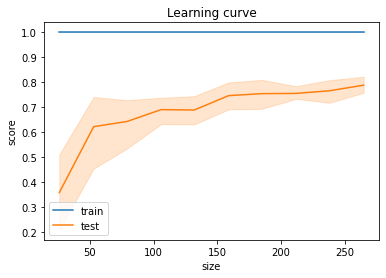

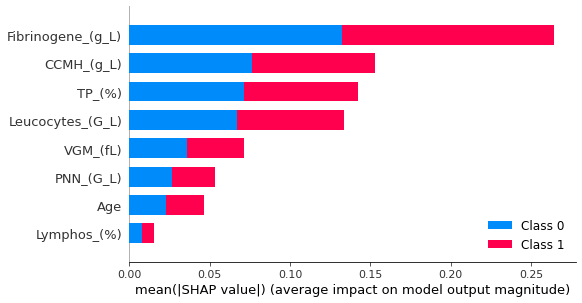


*********  XgBoost  *********

Score train : 1.0
-----------
Score test : 0.86
-----------
AUC: 0.95 (std:0.0205), (splits = 5)


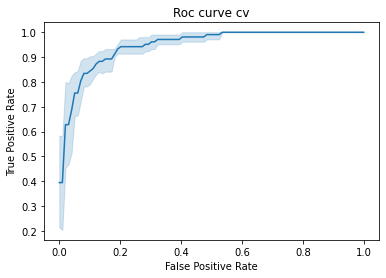

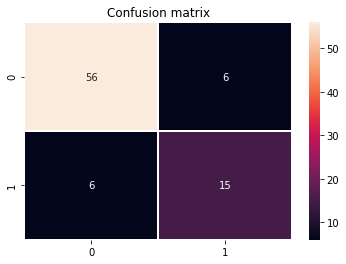

--------
Classification reporting
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        62
         1.0       0.71      0.71      0.71        21

    accuracy                           0.86        83
   macro avg       0.81      0.81      0.81        83
weighted avg       0.86      0.86      0.86        83



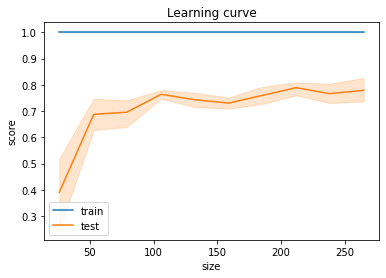

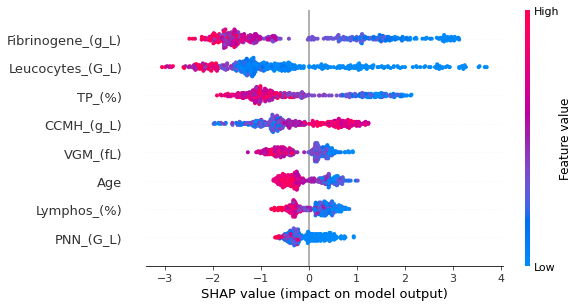

In [13]:
## je boucle sur mon dictionaire et appel la classe, je patiente et analyse les résulats
for name, model in dict_models.items():
    print("")
    print("********* ",name," *********")
    print("")
    AI = MainAiJob(model, df_clean, target_name='target', catagorical_features=False,
                        test_size=test_size, random_state=random_state, learning_curve_mod=True, normalize=False,
                        list_col_name_drop=drop_col,show_explainers=True)
#     model = AI.core_job()

In [14]:
def Best_opti(x_full,y_full,model,test_size=0.3, random_state=69, normalize=False):
    """ For classification binaries case
    Split the data, Fit the model, and return best_parameters
    
    params :
    
    x_full = features dataframe
    y_full = target dataframe
    model = model observed (not yet fitted)
    test_size  = the size of split, 0.2 by default type float
    random_state= 69 by default, make your process reproducible type int.
    normalize = Apply tandardscaler on dataset

    return : Best hyper parameters for model
    """    
    seed = random_state
    np.random.seed(seed)
    
    ##Split data in train/test using stratify = take randomly the same sample number from each class.
    X_train, X_test, y_train, y_test = train_test_split(x_full, y_full, test_size=test_size, 
                                                        random_state=seed, stratify=y_full)
    
    ######## Insert normalize job #######
    if normalize:
        scale = StandardScaler()
        X_train = scale.fit_transform(X_train)
        X_test = scale.transform(X_test)
    
    param_grid = [{'n_estimators': [150,200,300,400],'max_depth': [2,3,4,5]}]
    grid_search = GridSearchCV(model,param_grid, cv=5, scoring ='f1', return_train_score=True)
    grid_search.fit(X_train,y_train)
    
    return grid_search.best_params_

In [15]:
cl3 = ClassifierJob(df_clean, model)
x_full_v3, y_full_v3 = cl3.split_features_target(list_col_name_drop=drop_col) 

In [16]:
for name, model in dict_models.items():
    print("")
    print("********* ",name," *********")
    print("")
    params = Best_opti(x_full_v3, y_full_v3,model)
    print(params)


*********  Random Forest   *********

{'max_depth': 4, 'n_estimators': 150}

*********  XgBoost  *********

{'max_depth': 2, 'n_estimators': 150}


In [17]:
model_win_opti = xgb.XGBClassifier(max_depth=2, n_estimators=150)

Score train : 0.99
-----------
Score test : 0.89
-----------
AUC: 0.95 (std:0.0219), (splits = 5)


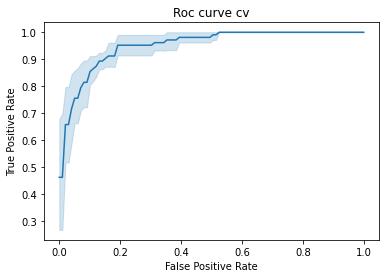

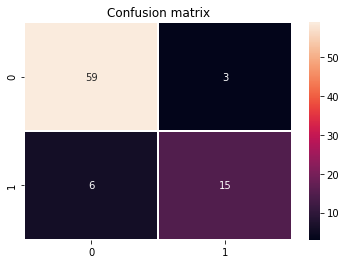

--------
Classification reporting
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        62
         1.0       0.83      0.71      0.77        21

    accuracy                           0.89        83
   macro avg       0.87      0.83      0.85        83
weighted avg       0.89      0.89      0.89        83



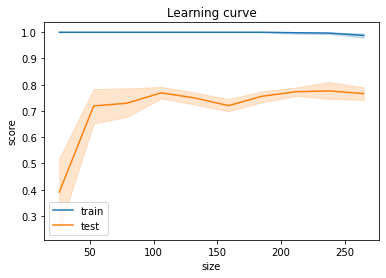

In [18]:
cl3 = ClassifierJob(df_clean, model_win_opti)
x_full_v3, y_full_v3 = cl3.split_features_target(list_col_name_drop=drop_col) ## add here the drop job
model_fited_v2 = cl3.fit_and_eval(test_size,random_state, learning_curve_mod=True, normalize=False) 

AUC: 0.9428868407578085 (std:0.02651155933976577)
AUC: 0.9545038402457756 (std:0.02214440969800444)


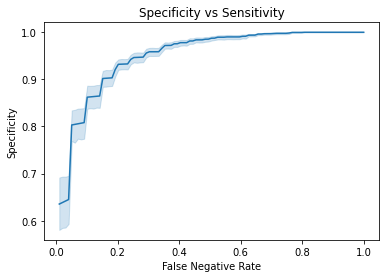

In [19]:
result_xgb, aucs = roc.roc_curve_cv(xgb.XGBClassifier(max_depth=2, n_estimators=200), x_full_v3, y_full_v3, n_splits=5, n_repeats=5)
print(f"AUC: {np.mean(aucs)} (std:{np.std(aucs)})")
result_rf, aucs = roc.roc_curve_cv(RandomForestClassifier(), x_full_v3, y_full_v3, n_splits=5, n_repeats=5)
print(f"AUC: {np.mean(aucs)} (std:{np.std(aucs)})")


roc.plot_specificity_cv({'XGB': result_xgb, 'RF':result_rf}, invert_x=True, invert_y=False)
plt.show()

In [20]:
# cl3.optimize_model(minimize=True)

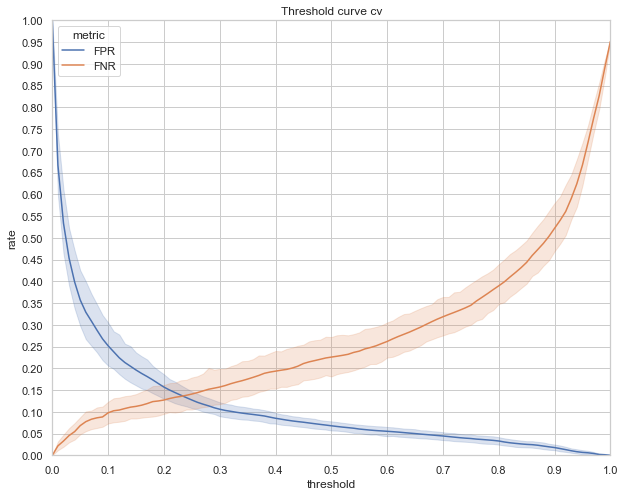

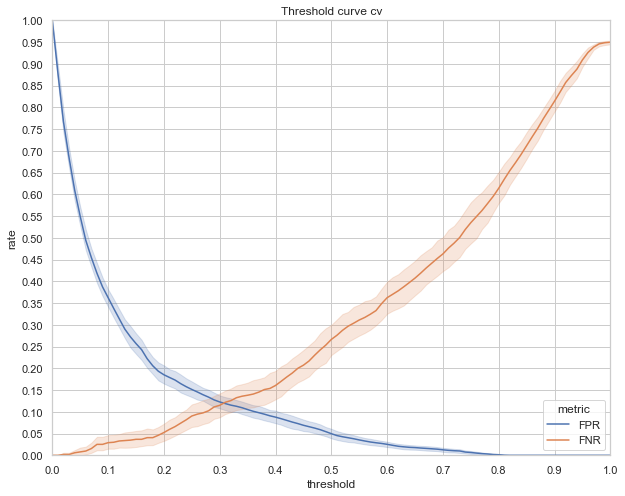

In [21]:
def thresh_curve(result):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.set(style="whitegrid")
    roc_fig = roc.plot_roc_threshold_cv(result,
                            tpr=False,
                            fpr=True,
                            tnr=False,
                            fnr=True,)

    roc_fig.set_yticks(np.arange(0,1.05,0.05));
    roc_fig.set_xticks(np.arange(0,1.05,0.1));
    roc_fig.set(xlim=(0,1),ylim=(0,1))
    
thresh_curve(result_xgb)
thresh_curve(result_rf)

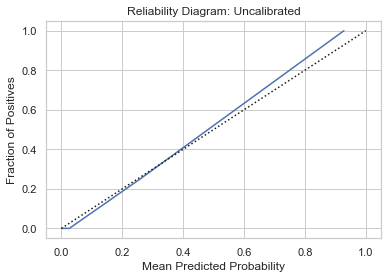

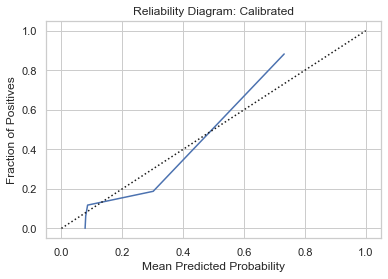

Brier score  =  0.02527691662114005


In [22]:
model_win_calibrated = cl3.Calibrate_fited_model(n_bins=5)

# Consume Val

In [47]:
validation_df = cl3.get_X_test
validation_df['target'] = cl3.get_y_test
validation_df['Patient_numbers'] = validation_df.index


# validation_df = pd.read_csv("../data/...")

c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\users\nicof\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
validation_df

Age  Leucocytes_(G_L)  VGM_(fL)  CCMH_(g_L)  PNN_(G_L)  Lymphos_(%)  \
202  83.0             40.90     101.0       324.0       3.60    24.000000   
156  30.0              8.10      92.7       348.0       0.50    21.000000   
392  75.0              4.35      95.5       346.0       1.57    17.000000   
235  66.0              1.60      99.0       345.0       0.10    68.800000   
312  66.0              0.66      83.8       360.0       1.00    19.200000   
..    ...               ...       ...         ...        ...          ...   
313  53.0              1.34      98.9       357.0       0.34    65.671642   
360  55.0             73.25      97.3       334.0      23.44     2.498294   
84   30.0            174.50     101.2       314.0       2.30    13.900000   
89   59.0            173.30     104.0       360.0       3.50     7.000000   
355  46.0             30.04      89.0       312.0       9.31     7.989348   

     TP_(%)  Fibrinogene_(g_L)  target Patient_numbers  
202    64.0               3.90     0.0             202  
156    82.0               4.50     0.0             156  
392    80.0               3.67     0.0             392  
235    92.0               6.50     0.0             235  
312    59.0               2.30     1.0             312  
..      ...                ...     ...             ...  
313    42.0               2.20     1.0             313  
360    67.0               3.09     0.0             360  
84     66.0               2.40     0.0              84  
89     68.0               3.60     0.0              89  
355    73.0               6.50     0.0             355  

[83 rows x 10 columns]

In [49]:
def iso_id(df,p_number):
    """return df with only data for patient number"""
    df = df[df['Patient_numbers'].isin([p_number])]
    return df

In [50]:
id_list = validation_df["Patient_numbers"]
id_list = [str(element) for element in id_list]

In [51]:
id_list

['202',
 '156',
 '392',
 '235',
 '312',
 '220',
 '317',
 '23',
 '381',
 '286',
 '341',
 '152',
 '344',
 '98',
 '391',
 '159',
 '158',
 '410',
 '212',
 '251',
 '43',
 '414',
 '213',
 '216',
 '229',
 '172',
 '365',
 '404',
 '308',
 '54',
 '151',
 '334',
 '371',
 '248',
 '35',
 '182',
 '311',
 '306',
 '321',
 '318',
 '363',
 '387',
 '268',
 '135',
 '173',
 '133',
 '6',
 '21',
 '402',
 '397',
 '100',
 '127',
 '164',
 '405',
 '187',
 '265',
 '120',
 '86',
 '337',
 '94',
 '26',
 '219',
 '243',
 '69',
 '166',
 '241',
 '352',
 '222',
 '214',
 '30',
 '39',
 '351',
 '364',
 '99',
 '33',
 '395',
 '275',
 '138',
 '313',
 '360',
 '84',
 '89',
 '355']

Vous pouvez tester le model_win_opti crée plus haut ou charger le model drop qui tourne dans l'app.


Score Validation : 0.96


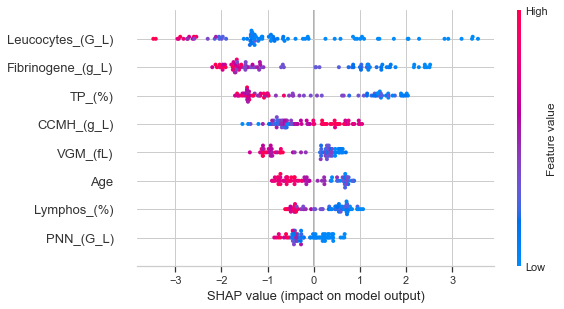

In [52]:
databrick = load("../Model/databrick_model_2021-02-21_14_37_04_740893.joblib") 

## Bloc pour excécuter la prédiction, il est en mode notebook, il est plus simple sur le sricpt.
cleandata = DataClean(validation_df)
validation_df = cleandata.prod_clean_job(databrick)
cl = ClassifierJob(validation_df,model_win_opti)
x_valid, y_valid = cl.split_features_target() ### list_col_name_drop

m_val_step = consume_validation.ConsumeModelClf(x_valid,model_win_opti,validation=True,true_y=y_valid.values)
m_val_step.predict_job()

## retourne la matrice de résultat dans un df et expose la figure explicative
final_df = m_val_step.show_result()
m_val_step.explain()

In [53]:
final_df["Id"] = id_list
final_df

Id  Predictions  Trust%  True_value
0   202          0.0   99.95         0.0
1   156          0.0   98.30         0.0
2   392          0.0   99.54         0.0
3   235          0.0   98.66         0.0
4   312          1.0   98.92         1.0
..  ...          ...     ...         ...
78  313          1.0   87.70         1.0
79  360          0.0   99.81         0.0
80   84          0.0   99.65         0.0
81   89          0.0   99.95         0.0
82  355          0.0   99.41         0.0

[83 rows x 4 columns]

In [54]:
def apply_thresh(df,thres=95):
    if df["Predictions"] == 0.0 :
        if df["Trust%"] <=thres:
            return 1.0
        else:
            return 0.0
    else:
        return 1.0    

In [55]:
final_df['Correction'] = final_df.apply(apply_thresh, axis=1)

In [56]:
final_df

Id  Predictions  Trust%  True_value  Correction
0   202          0.0   99.95         0.0         0.0
1   156          0.0   98.30         0.0         0.0
2   392          0.0   99.54         0.0         0.0
3   235          0.0   98.66         0.0         0.0
4   312          1.0   98.92         1.0         1.0
..  ...          ...     ...         ...         ...
78  313          1.0   87.70         1.0         1.0
79  360          0.0   99.81         0.0         0.0
80   84          0.0   99.65         0.0         0.0
81   89          0.0   99.95         0.0         0.0
82  355          0.0   99.41         0.0         0.0

[83 rows x 5 columns]

In [57]:
def details_score(final_df, key_analytics='Correction'):
    ac = metrics.accuracy_score(final_df['True_value'].values, final_df[f'{key_analytics}'].values)
    print("Score :",round(ac,2))
    df_cl1 = final_df[final_df['True_value'].isin([1.0])]
    df_cl1 = df_cl1.reset_index()
    ac = metrics.accuracy_score(df_cl1['True_value'].values, df_cl1[f'{key_analytics}'].values)
    print("Score classe 1 :",round(ac,2))
    df_cl0 = final_df[final_df['True_value'].isin([0.0])]
    ac = metrics.accuracy_score(df_cl0['True_value'].values, df_cl0[f'{key_analytics}'].values)
    print("Score classe 0 :",round(ac,2))
    return df_cl1

In [58]:
print("Sans Seuil")
print("------")
df_cl1 = details_score(final_df, key_analytics='Predictions')

print("------------------------------")

print("Avec Seuil")
print("------")
df_cl1 = details_score(final_df)

Sans Seuil
------
Score : 0.96
Score classe 1 : 0.86
Score classe 0 : 1.0
------------------------------
Avec Seuil
------
Score : 0.82
Score classe 1 : 1.0
Score classe 0 : 0.76


In [59]:
def apply_is_error(df):
    if df["Predictions"] == df["True_value"]:
        return 0
    else:
        return 1
    
final_df['is_error'] = final_df.apply(apply_is_error, axis=1)
error_df = final_df[final_df["is_error"].isin([1])]
error_df = error_df.drop(columns=["is_error"])
error_df 

Id  Predictions  Trust%  True_value  Correction
17  410          0.0   86.60         1.0         1.0
20   43          0.0   50.75         1.0         1.0
74   33          0.0   57.49         1.0         1.0

# Anomalies and forms

In [36]:
from lib.anomaly_detection import Anomaly_nature

from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_moons


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [37]:
X_info = pd.DataFrame()
X_info['Patient_numbers'] = df_all['Patient_numbers']
X_info['Chu'] = df_clean['Chu']

In [38]:
df_clean_ph2 = df_clean.drop(columns=drop_col)
df_clean_ph2.head(5)

target   Age  Leucocytes_(G_L)  VGM_(fL)  CCMH_(g_L)  PNN_(G_L)  \
0     1.0   4.0               3.6      84.0       354.0        0.8   
1     1.0  46.0               7.1      77.3       349.0        4.5   
2     1.0  52.0               1.9      83.4       360.0        7.0   
3     1.0  49.0               1.0     102.3       348.0        0.1   
4     1.0  49.0               1.1      91.1       341.0        0.4   

   Lymphos_(%)  TP_(%)  Fibrinogene_(g_L)  
0         63.9    67.0                2.9  
1         23.9    55.0                2.0  
2         36.8    80.0                1.1  
3         80.0    94.0                3.1  
4         36.4    86.0                3.1

In [39]:
y_full_true = df_clean_ph2['target']
x_full = df_clean_ph2.drop(columns=['target'])

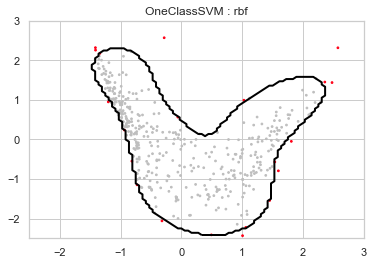

In [40]:
# kernel = ['poly', 'sigmoid','rbf'] #default='rbf' 'precomputed'
model_svm = svm.OneClassSVM(degree=1, nu=0.05, kernel='rbf', gamma='scale')

anomaly_algorithms = [
    model_svm,
#     IsolationForest(contamination=0.16,random_state=42)
]

for model in anomaly_algorithms:
    AN = Anomaly_nature(model, x_full, y_full_true,-2.5,3, reduce_dim=True)
    model_fited, fig = AN.build_anomalies_model()

In [41]:
AN.build_3dim(X_info=X_info)   

In [42]:
### Simulation d'entrée utlisateur en selectionant un sujet au hasard dans la distribution de train
### Il sera représenter par un point bleu.
X_input = x_full.sample(1)
X_input

Age  Leucocytes_(G_L)  VGM_(fL)  CCMH_(g_L)  PNN_(G_L)  Lymphos_(%)  \
210  1.0               8.4      72.3       350.0        2.3         63.1   

     TP_(%)  Fibrinogene_(g_L)  
210   100.0                2.2

In [43]:
### Sinon on en crée un
X_input = pd.DataFrame()

X_input.loc[0,"Age"] = 72.0
X_input.loc[0,"Leucocytes_(G_L)"] = 2.3
X_input.loc[0,"VGM_(fL)"] = 83.5
X_input.loc[0,"CCMH_(g_L)"] = 618.0

X_input.loc[0,"PNN_(G_L)"] = 0.5
X_input.loc[0,"Lymphos_(%)"] = 56.5
X_input.loc[0,"TP_(%)"] = 96.0
X_input.loc[0,"Fibrinogene_(g_L)"] = 5.4

X_input

Age  Leucocytes_(G_L)  VGM_(fL)  CCMH_(g_L)  PNN_(G_L)  Lymphos_(%)  \
0  72.0               2.3      83.5       618.0        0.5         56.5   

   TP_(%)  Fibrinogene_(g_L)  
0    96.0                5.4

-1


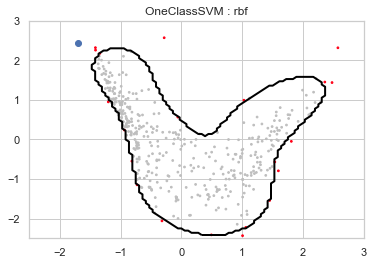

In [44]:
for model in anomaly_algorithms:
    AN = Anomaly_nature(model, x_full, y_full_true, -2.5,3, reduce_dim=True)
    model_fited, fig,anomalie_prediction = AN.build_anomalies_model(X_input=X_input)
    print(int(anomalie_prediction))

In [45]:
AN.build_3dim(X_input=X_input,X_info=X_info)

In [46]:
fig = px.parallel_coordinates(df_clean_ph2, color="target", 
                             color_continuous_scale=px.colors.sequential.Inferno,
                             color_continuous_midpoint=2)
fig.show()